In [8]:
%load_ext autoreload
%autoreload 2


In [11]:
import warnings

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

from birdshot.analysis.engine import ERGFeatureExtractor
from birdshot.analysis.results import (
    extract_f30_score,
    extract_scoto_cone_rod_score,
    extract_scoto_rod_score,
)
from birdshot.io.load import load_gt_spreadcheet
from birdshot.io.output import write_to_excel

warnings.simplefilter(
    action="ignore", category=(pd.errors.PerformanceWarning, RuntimeWarning)
)
sns.set_theme()

In [9]:
patients = dict()
data = dict()
for i in range(1, 30):
    patient = f"{i:0=3}"
    patient_filepath = f"/home/clement/Documents/data/Birdshot/data/Patient {patient}/"
    featex = ERGFeatureExtractor(
        patient_filepath,
        plot=False,
        scotorod_low_pass=50,
        scotorodcone_low_pass=50,
        scotorodcone_time_limits=(10, 75),
        f30_low_pass=150,
    )
    featex.extract_all_features()
    data[i] = featex.format_results()
    patients[i] = featex


P007 (2015.08.10) Scoto
P007 (2015.08.10) Scoto
P007 (2015.08.10) F30
P012 (2018.11.19) F30-3cd
P013 (2015.09.15) F30
P016 (2023.07.17) F30
P016 (2024.12.13) F30
P019 (2015.12.01) Scoto
P019 (2015.12.01) Scoto
P019 (2015.12.01) F30Hz
P022 (2018.11.13) F30
P026 (2019.11.12) F30
P026 (2020.07.21) F30
P026 (2021.01.12) F30
P026 (2022.02.24) F30
P026 (2022.11.24) F30
P026 (2025.01.21) F30


In [31]:
write_to_excel(data, "result.xlsx")


In [29]:
ref_filepath = "/home/clement/Documents/data/Birdshot/data/BSCR Follow up database (Clement March 2025).xlsx"
gt_patients = load_gt_spreadcheet(ref_filepath)


Year 2017 not in gt of patient 8
Year 2024 not in gt of patient 21


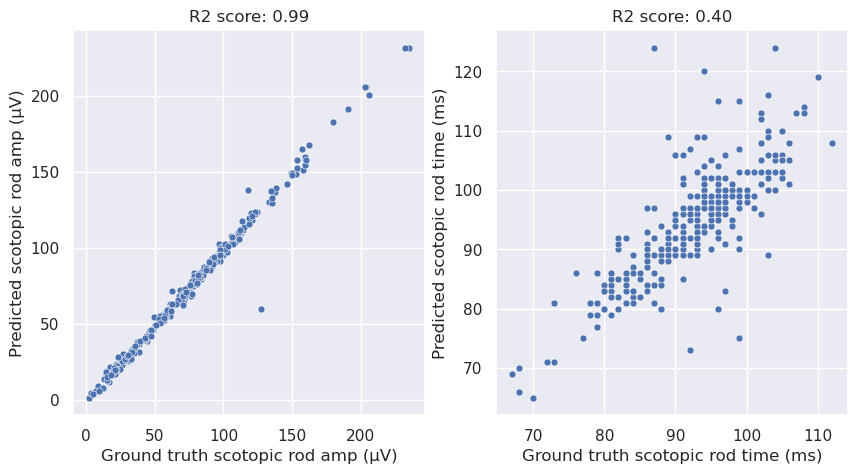

In [4]:
result = extract_scoto_rod_score(gt_patients, data)

figsize = (10, 5)
fig, axs = plt.subplots(1, 2, figsize=figsize)
# Scatter plot of amp pred and amp gt
sns.scatterplot(
    x=result["amp gt"],
    y=result["amp pred"],
    ax=axs[0],
    s=25,
)
axs[0].set_xlabel("Ground truth scotopic rod amp (µV)")
axs[0].set_ylabel("Predicted scotopic rod amp (µV)")
r_score = r2_score(result["amp gt"], result["amp pred"])
axs[0].set_title(f"R2 score: {r_score:.2f}")


# Same thing with time
# Scatter plot of amp pred and amp gt
sns.scatterplot(
    x=result["time gt"],
    y=result["time pred"],
    ax=axs[1],
    s=25,
)
axs[1].set_xlabel("Ground truth scotopic rod time (ms)")
axs[1].set_ylabel("Predicted scotopic rod time (ms)")
r_score = r2_score(result["time gt"], result["time pred"])
axs[1].set_title(f"R2 score: {r_score:.2f}")
plt.show()


Year 2017 not in gt of patient 8
Year 2024 not in gt of patient 21


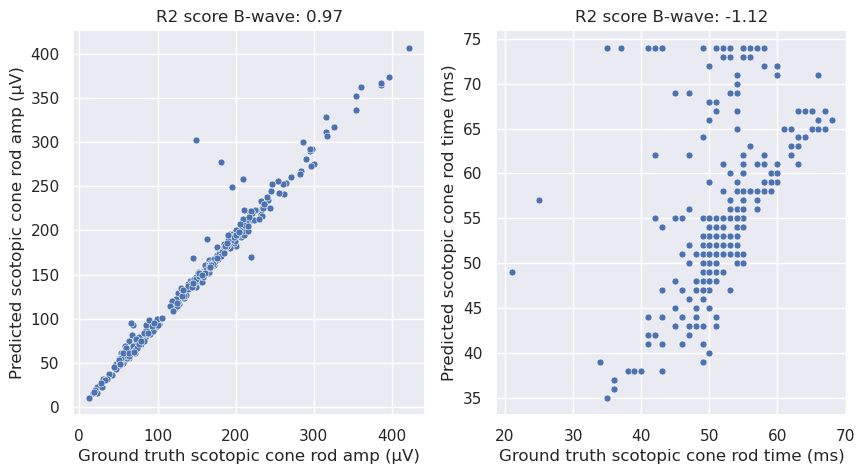

In [5]:
result = extract_scoto_cone_rod_score(gt_patients, data)


figsize = (10, 5)
fig, axs = plt.subplots(1, 2, figsize=figsize)
# Scatter plot of amp pred and amp gt
sns.scatterplot(
    x=result["amp b-wave gt"],
    y=result["amp b-wave pred"],
    ax=axs[0],
    s=25,
)
axs[0].set_xlabel("Ground truth scotopic cone rod amp (µV)")
axs[0].set_ylabel("Predicted scotopic cone rod amp (µV)")
r_score = r2_score(result["amp b-wave gt"], result["amp b-wave pred"])
axs[0].set_title(f"R2 score B-wave: {r_score:.2f}")


# Same thing with time
# Scatter plot of amp pred and amp gt
sns.scatterplot(
    x=result["time b-wave gt"],
    y=result["time b-wave pred"],
    ax=axs[1],
    s=25,
)
axs[1].set_xlabel("Ground truth scotopic cone rod time (ms)")
axs[1].set_ylabel("Predicted scotopic cone rod time (ms)")
r_score = r2_score(result["time b-wave gt"], result["time b-wave pred"])
axs[1].set_title(f"R2 score B-wave: {r_score:.2f}")
plt.show()

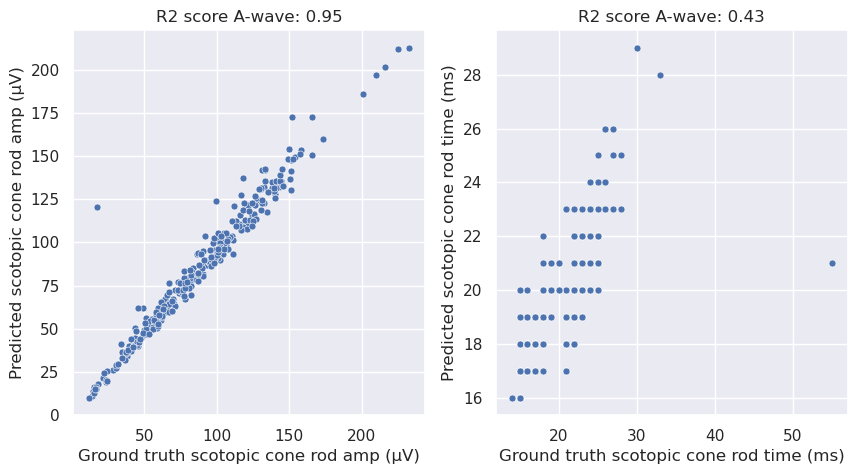

In [6]:
figsize = (10, 5)
fig, axs = plt.subplots(1, 2, figsize=figsize)
# Scatter plot of amp pred and amp gt
sns.scatterplot(
    x=result["amp a-wave gt"],
    y=result["amp a-wave pred"],
    ax=axs[0],
    s=25,
)
axs[0].set_xlabel("Ground truth scotopic cone rod amp (µV)")
axs[0].set_ylabel("Predicted scotopic cone rod amp (µV)")
r_score = r2_score(result["amp a-wave gt"], result["amp a-wave pred"])
axs[0].set_title(f"R2 score A-wave: {r_score:.2f}")


# Same thing with time
# Scatter plot of amp pred and amp gt
sns.scatterplot(
    x=result["time a-wave gt"],
    y=result["time a-wave pred"],
    ax=axs[1],
    s=25,
)
axs[1].set_xlabel("Ground truth scotopic cone rod time (ms)")
axs[1].set_ylabel("Predicted scotopic cone rod time (ms)")
r_score = r2_score(result["time a-wave gt"], result["time a-wave pred"])
axs[1].set_title(f"R2 score A-wave: {r_score:.2f}")
plt.show()

Year 2017 not in gt of patient 8
Year 2024 not in gt of patient 21


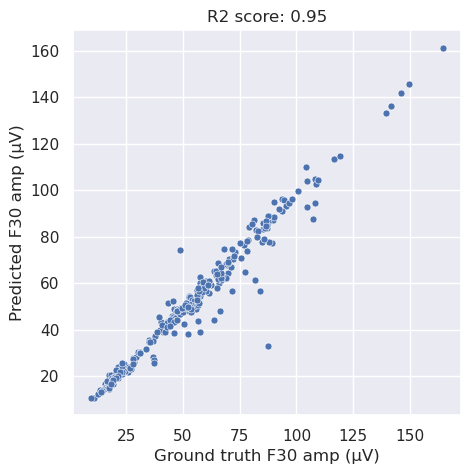

In [7]:
result = extract_f30_score(gt_patients, data)

fig, ax = plt.subplots(figsize=(5, 5))
# Scatter plot of amp pred and amp gt
sns.scatterplot(
    x=result["F30 amp gt"],
    y=result["F30 amp pred"],
    ax=ax,
    s=25,
)
ax.set_xlabel("Ground truth F30 amp (µV)")
ax.set_ylabel("Predicted F30 amp (µV)")
r_score = r2_score(result["F30 amp gt"], result["F30 amp pred"])
ax.set_title(f"R2 score: {r_score:.2f}")
plt.show()
